In [1]:
!pip install pandas

In [40]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [10]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [16]:
 !pip install scikit-learn

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(columns=['Exited'])
y= df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [19]:
X_train.shape

(8000, 11)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
!pip install tensorflow==2.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0


In [22]:
!python --version


Python 3.11.11


In [60]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Initialize the model
model = Sequential()

# Adding the input layer
# We use an Input layer to define the input shape (11 features)
# Input layer doesn't need to be explicitly added as the first Dense layer
# will automatically infer the input shape, but we can define it for clarity.
model.add(Input(shape=(11,)))  # Here, 11 is the number of features (input shape)

# # Adding the hidden layer
# # 3 perceptrons (neurons) in this hidden layer, with a sigmoid activation function
# model.add(Dense(3, activation='sigmoid'))  # The number of perceptrons is 3

# # Adding the output layer
# # Output layer with 1 perceptron and sigmoid activation (for binary classification)
# model.add(Dense(1, activation='sigmoid'))

#making changes to improve accuracy
model.add(Dense(11, activation='relu'))
#first hidden layer with 11 perceptrons, relu activation fn
model.add(Dense(11, activation='relu'))
#second hidden layer with 11 perceptrons, relu activation fn
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [63]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)
#history will store the info during each stage of training

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6239 - loss: 0.6438 - val_accuracy: 0.8019 - val_loss: 0.4770
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8052 - loss: 0.4644 - val_accuracy: 0.8081 - val_loss: 0.4514
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7943 - loss: 0.4664 - val_accuracy: 0.8125 - val_loss: 0.4358
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8038 - loss: 0.4387 - val_accuracy: 0.8188 - val_loss: 0.4234
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8142 - loss: 0.4127 - val_accuracy: 0.8250 - val_loss: 0.4129
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8105 - loss: 0.4177 - val_accuracy: 0.8269 - val_loss: 0.4011
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8203 - loss: 0.4000 - val_accuracy: 0.8394 - val_loss: 0.3880
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8369 - loss: 0.3761 - val_accu

In [64]:
history.history

{'accuracy': [0.7268750071525574,
  0.7962499856948853,
  0.7990624904632568,
  0.8026562333106995,
  0.809374988079071,
  0.8137500286102295,
  0.8214062452316284,
  0.8345312476158142,
  0.844531238079071,
  0.8478124737739563,
  0.8548437356948853,
  0.8545312285423279,
  0.856249988079071,
  0.8571875095367432,
  0.8589062690734863,
  0.8581249713897705,
  0.8587499856948853,
  0.859375,
  0.860156238079071,
  0.8606250286102295,
  0.8617187738418579,
  0.8618749976158142,
  0.8604687452316284,
  0.8629687428474426,
  0.8634374737739563,
  0.8635937571525574,
  0.8650000095367432,
  0.86328125,
  0.8657812476158142,
  0.8621875047683716,
  0.8635937571525574,
  0.8639062643051147,
  0.8635937571525574,
  0.8642187714576721,
  0.8654687404632568,
  0.8645312786102295,
  0.8648437261581421,
  0.86328125,
  0.8645312786102295,
  0.8631250262260437,
  0.8637499809265137,
  0.8653125166893005,
  0.8653125166893005,
  0.8645312786102295,
  0.8650000095367432,
  0.8653125166893005,
  0.86

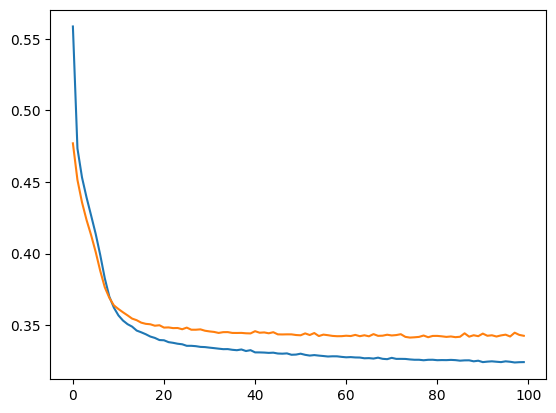

In [68]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [53]:
model.layers[0].get_weights()

[array([[ 0.10235199, -0.02729407, -0.29689068,  0.17194222, -0.18882293,
          0.05254847, -0.02412846,  0.17464419,  0.03954822,  0.2192056 ,
          0.2657583 ],
        [ 0.13614827,  0.06501141,  1.1472802 ,  0.46831146,  0.68798125,
         -0.9236476 ,  0.90113753, -0.22191288, -0.16493824, -0.25321862,
          0.2642599 ],
        [-0.07170658,  0.18295506, -0.26123932, -0.12318897,  0.33628646,
          0.04486928, -0.07410918, -0.01639474,  0.11084247,  0.13971083,
          0.26739368],
        [-0.82583696,  0.7422567 , -0.4203305 , -0.09842348,  0.22384715,
         -0.15849143,  0.07685588, -0.30745456, -0.01586948, -0.7000992 ,
         -0.432479  ],
        [ 1.2519408 ,  1.0856526 , -0.10618119,  0.27615508,  0.463923  ,
          0.14059034, -1.0662065 , -0.03953137,  0.02789063, -1.2422748 ,
         -0.1934734 ],
        [ 0.1558718 ,  0.04680955, -0.30236602,  0.0962111 ,  0.5484045 ,
          0.06579883, -0.00803998, -0.03814459, -0.17619398,  0.1423179

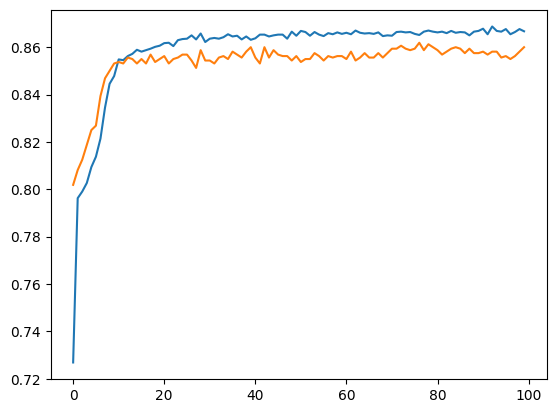

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [70]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [71]:
#The above results are probabilities of 'Exited' = 1
#We need to decide a threshold using ROC or other methods, for now, we will assume a threshold of 0.5
y_pred = np.where(y_log>=0.5, 1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.863